In [14]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

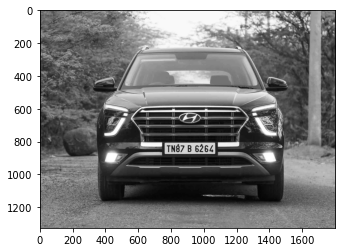

In [15]:
img = cv2.imread('1.webp')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

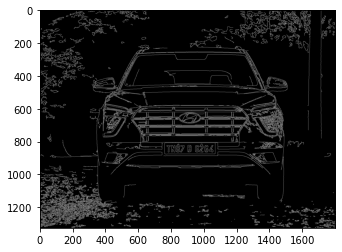

In [16]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #To reduce Noise
edged = cv2.Canny(bfilter, 30, 200) #For Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [17]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [18]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [19]:
location

array([[[ 757,  812]],

       [[1062,  807]],

       [[1065,  872]],

       [[ 763,  876]]], dtype=int32)

In [20]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

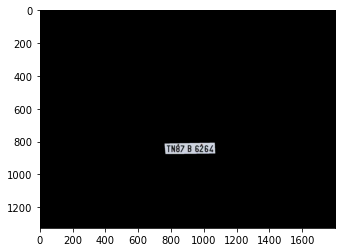

In [21]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [22]:


(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]



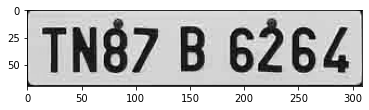

In [23]:


plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))



In [24]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[7, 0], [307, 0], [307, 67], [7, 67]], 'TN8z B 6264', 0.34320453623744246)]

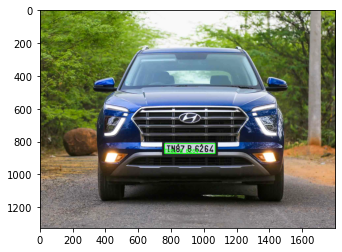

In [25]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [26]:
print(text)

TN8z B 6264
